In [ ]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.max_columns = None
import numpy as np
from plotnine import *
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split # simple TT split cv

#clustering imports
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
DMAS = pd.read_csv("https://raw.githubusercontent.com/a-rea/mgsc410Homework4/main/PI-18803%20DMAs.xlsx%20-%20DMAs.csv")

In [ ]:
DMAS

,DMA,Name,DMA Name,Area,Latitude,Longitude,Country,Population 18+,Household Count,Med HHld Income,HHlds No Vehicles,HHlds 1-2 Vehicles,HHlds 2+ Vehicles,HHld Exp - Public Transport,HHld Exp - Intercity Bus Fare,HHld Exp - Mass Transit,HHld Exp - Taxi,HHld Exp - Other Public Transportation,White,African American,American Indian,Asian,Hawaiian/Pacific Islander,Other Race,Multi-Race,Hispanic
0,111,Non-DMA Areas,Non-DMA Areas,524050.67609,63.09978,-151.23083,United States,"102,531","48,817","68,110","11,966","16,091","20,760",749,22,129,29,87,"57,829","2,118","29,940","10,488",364,672,"33,247","7,152"
1,500,Portland-Auburn (ME),Portland-Auburn (ME),11256.41264,44.36621,-70.39654,United States,"813,154","439,499","59,700","31,383","148,379","259,737",730,22,126,28,85,"941,445","18,566","3,097","14,704",221,614,"17,448","20,036"
2,501,New York,New York,11734.29043,40.84238,-74.21172,United States,"16,778,672","8,025,869","76,955","2,299,938","2,578,274","3,147,657","1,079",32,185,41,126,"10,286,851","3,636,919","32,001","2,413,446","5,202","104,864","334,620","4,906,874"
3,502,Binghampton,Binghampton,3599.23101,42.28175,-75.49588,United States,"271,193","144,905","52,373","14,600","51,135","79,170",664,20,114,25,78,"299,851","12,788",614,"10,466",80,245,"6,640","12,142"
4,503,Macon,Macon,8386.80918,32.52069,-83.31905,United States,"514,116","262,841","44,920","20,194","89,611","153,036",598,18,103,23,69,"355,382","266,690","1,351","11,666",251,718,"9,793","28,434"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,855,Santa Barbara-Santa Maria-San Luis Obisp,Santa Barbara-Santa Maria-San Luis Obispo,6071.20104,35.08402,-120.39417,United States,"568,468","255,995","71,358","13,404","75,810","166,781",912,27,157,35,106,"392,854","15,003","3,086","35,528","1,010","1,037","16,753","262,196"
207,862,Sacramento-Stockton-Modesto,Sacramento-Stockton-Modesto,19659.67011,37.75508,-120.98935,United States,"3,257,693","1,518,075","65,482","88,721","450,605","978,749",850,25,146,33,99,"2,129,501","289,244","24,651","513,002","23,388","6,074","165,093","1,196,698"
208,866,Fresno-Visalia,Fresno-Visalia,17828.29184,36.42208,-119.61470,United States,"1,434,699","631,364","49,514","48,407","194,144","388,813",675,20,116,26,78,"626,287","84,626","12,690","148,833","2,269","3,090","37,200","1,133,211"
209,868,Chico-Redding,Chico-Redding,17204.12899,40.00768,-121.81103,United States,"404,649","211,313","47,749","13,694","68,284","129,335",656,19,113,25,76,"382,352","7,335","8,457","18,311",686,340,"18,985","84,714"


In [ ]:
def remove_unwanted_char(df):
  df = df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)
  df = df.applymap(lambda x: x.replace('a/ ', '') if isinstance(x, str) else x)
  return df

In [ ]:
DMAS = remove_unwanted_char(DMAS)

In [ ]:
DMAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   DMA                                     211 non-null    int64  
 1   Name                                    211 non-null    object 
 2   DMA Name                                211 non-null    object 
 3   Area                                    211 non-null    float64
 4   Latitude                                211 non-null    float64
 5   Longitude                               211 non-null    float64
 6   Country                                 211 non-null    object 
 7   Population 18+                          211 non-null    object 
 8   Household Count                         211 non-null    object 
 9   Med HHld Income                         211 non-null    object 
 10  HHlds No Vehicles                       211 non-null    object

In [ ]:
def to_num(df):
  for i in df:
    if i != 'Name' and i != 'DMA Name' and i != 'Country' and i != 'Type':
      df[i] = pd.to_numeric(df[i])

In [ ]:
to_num(DMAS)

In [ ]:
DMAS['Hhlds Vehicles'] = DMAS['HHlds 1-2 Vehicles'] + DMAS['HHlds 2+ Vehicles']

In [ ]:
DMAS

,DMA,Name,DMA Name,Area,Latitude,Longitude,Country,Population 18+,Household Count,Med HHld Income,HHlds No Vehicles,HHlds 1-2 Vehicles,HHlds 2+ Vehicles,HHld Exp - Public Transport,HHld Exp - Intercity Bus Fare,HHld Exp - Mass Transit,HHld Exp - Taxi,HHld Exp - Other Public Transportation,White,African American,American Indian,Asian,Hawaiian/Pacific Islander,Other Race,Multi-Race,Hispanic,Hhlds Vehicles
0,111,Non-DMA Areas,Non-DMA Areas,524050.67609,63.09978,-151.23083,United States,102531,48817,68110,11966,16091,20760,749,22,129,29,87,57829,2118,29940,10488,364,672,33247,7152,36851
1,500,Portland-Auburn (ME),Portland-Auburn (ME),11256.41264,44.36621,-70.39654,United States,813154,439499,59700,31383,148379,259737,730,22,126,28,85,941445,18566,3097,14704,221,614,17448,20036,408116
2,501,New York,New York,11734.29043,40.84238,-74.21172,United States,16778672,8025869,76955,2299938,2578274,3147657,1079,32,185,41,126,10286851,3636919,32001,2413446,5202,104864,334620,4906874,5725931
3,502,Binghampton,Binghampton,3599.23101,42.28175,-75.49588,United States,271193,144905,52373,14600,51135,79170,664,20,114,25,78,299851,12788,614,10466,80,245,6640,12142,130305
4,503,Macon,Macon,8386.80918,32.52069,-83.31905,United States,514116,262841,44920,20194,89611,153036,598,18,103,23,69,355382,266690,1351,11666,251,718,9793,28434,242647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,855,Santa Barbara-Santa Maria-San Luis Obisp,Santa Barbara-Santa Maria-San Luis Obispo,6071.20104,35.08402,-120.39417,United States,568468,255995,71358,13404,75810,166781,912,27,157,35,106,392854,15003,3086,35528,1010,1037,16753,262196,242591
207,862,Sacramento-Stockton-Modesto,Sacramento-Stockton-Modesto,19659.67011,37.75508,-120.98935,United States,3257693,1518075,65482,88721,450605,978749,850,25,146,33,99,2129501,289244,24651,513002,23388,6074,165093,1196698,1429354
208,866,Fresno-Visalia,Fresno-Visalia,17828.29184,36.42208,-119.61470,United States,1434699,631364,49514,48407,194144,388813,675,20,116,26,78,626287,84626,12690,148833,2269,3090,37200,1133211,582957
209,868,Chico-Redding,Chico-Redding,17204.12899,40.00768,-121.81103,United States,404649,211313,47749,13694,68284,129335,656,19,113,25,76,382352,7335,8457,18311,686,340,18985,84714,197619


In [ ]:
16091+20760

36851

As for feature engineering, we could consider creating new variables based on the existing ones. For example, we could calculate the ratio of the number of households with no vehicles to the total number of households to determine the level of car dependency in the area. We could also calculate the total household income by multiplying the median household income by the number of households in the area to get an estimate of the total purchasing power. Additionally, we could create a variable that measures the level of public transportation accessibility by combining the average household expenditure on public transportation, mass transit, and taxis. These new variables could provide additional insights into the area's potential for business.


In [ ]:
DMAS['CarDependency'] = DMAS['Hhlds Vehicles']/DMAS['Household Count']
DMAS['PurchasingPower'] = DMAS['Med HHld Income']*DMAS['Household Count']
DMAS

,DMA,Name,DMA Name,Area,Latitude,Longitude,Country,Population 18+,Household Count,Med HHld Income,HHlds No Vehicles,HHlds 1-2 Vehicles,HHlds 2+ Vehicles,HHld Exp - Public Transport,HHld Exp - Intercity Bus Fare,HHld Exp - Mass Transit,HHld Exp - Taxi,HHld Exp - Other Public Transportation,White,African American,American Indian,Asian,Hawaiian/Pacific Islander,Other Race,Multi-Race,Hispanic,Hhlds Vehicles,Density,CarDependency,PurchasingPower
0,111,Non-DMA Areas,Non-DMA Areas,524050.67609,63.09978,-151.23083,United States,102531,48817,68110,11966,16091,20760,749,22,129,29,87,57829,2118,29940,10488,364,672,33247,7152,36851,0.093153,0.754880,3324925870
1,500,Portland-Auburn (ME),Portland-Auburn (ME),11256.41264,44.36621,-70.39654,United States,813154,439499,59700,31383,148379,259737,730,22,126,28,85,941445,18566,3097,14704,221,614,17448,20036,408116,39.044322,0.928594,26238090300
2,501,New York,New York,11734.29043,40.84238,-74.21172,United States,16778672,8025869,76955,2299938,2578274,3147657,1079,32,185,41,126,10286851,3636919,32001,2413446,5202,104864,334620,4906874,5725931,683.967134,0.713434,617630748895
3,502,Binghampton,Binghampton,3599.23101,42.28175,-75.49588,United States,271193,144905,52373,14600,51135,79170,664,20,114,25,78,299851,12788,614,10466,80,245,6640,12142,130305,40.259989,0.899244,7589109565
4,503,Macon,Macon,8386.80918,32.52069,-83.31905,United States,514116,262841,44920,20194,89611,153036,598,18,103,23,69,355382,266690,1351,11666,251,718,9793,28434,242647,31.339809,0.923170,11806817720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,855,Santa Barbara-Santa Maria-San Luis Obisp,Santa Barbara-Santa Maria-San Luis Obispo,6071.20104,35.08402,-120.39417,United States,568468,255995,71358,13404,75810,166781,912,27,157,35,106,392854,15003,3086,35528,1010,1037,16753,262196,242591,42.165463,0.947640,18267291210
207,862,Sacramento-Stockton-Modesto,Sacramento-Stockton-Modesto,19659.67011,37.75508,-120.98935,United States,3257693,1518075,65482,88721,450605,978749,850,25,146,33,99,2129501,289244,24651,513002,23388,6074,165093,1196698,1429354,77.217725,0.941557,99406587150
208,866,Fresno-Visalia,Fresno-Visalia,17828.29184,36.42208,-119.61470,United States,1434699,631364,49514,48407,194144,388813,675,20,116,26,78,626287,84626,12690,148833,2269,3090,37200,1133211,582957,35.413600,0.923329,31261357096
209,868,Chico-Redding,Chico-Redding,17204.12899,40.00768,-121.81103,United States,404649,211313,47749,13694,68284,129335,656,19,113,25,76,382352,7335,8457,18311,686,340,18985,84714,197619,12.282691,0.935196,10089984437


In [176]:
DMAS['incomePerCapita'] = (DMAS['Med HHld Income']*DMAS['Household Count'])/DMAS['Population 18+']

In [ ]:
DMAS['Density'] = DMAS['Household Count']/DMAS['Area']

In [ ]:
DMAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   DMA                                     211 non-null    int64  
 1   Name                                    211 non-null    object 
 2   DMA Name                                211 non-null    object 
 3   Area                                    211 non-null    float64
 4   Latitude                                211 non-null    float64
 5   Longitude                               211 non-null    float64
 6   Country                                 211 non-null    object 
 7   Population 18+                          211 non-null    int64  
 8   Household Count                         211 non-null    int64  
 9   Med HHld Income                         211 non-null    int64  
 10  HHlds No Vehicles                       211 non-null    int64 

In [ ]:
variables = ["Med HHld Income", "Household Count", "CarDependency", "Population 18+", "PurchasingPower"]


subDF = DMAS[variables]

z = StandardScaler()

subDF[variables] = z.fit_transform(subDF)


sils = []
for k in range(2,10):
  GM = GaussianMixture(n_components = k)
  GM.fit(subDF)
  pred = GM.predict(subDF)
  print("silhouette for k =", k, ": ", silhouette_score(subDF,pred))
  sils.append(silhouette_score(subDF,pred))


chosen = np.argmax(sils) + 2
print(np.argmax(sils) + 2)


silhouette for k = 2 :  0.45648496813728534
silhouette for k = 3 :  0.3935127498873837
silhouette for k = 4 :  0.3411456793781704
silhouette for k = 5 :  0.25106277390742093
silhouette for k = 6 :  0.28204672940342207
silhouette for k = 7 :  0.3145391692172963
silhouette for k = 8 :  0.30061139180033614
silhouette for k = 9 :  0.1804439484533423
2


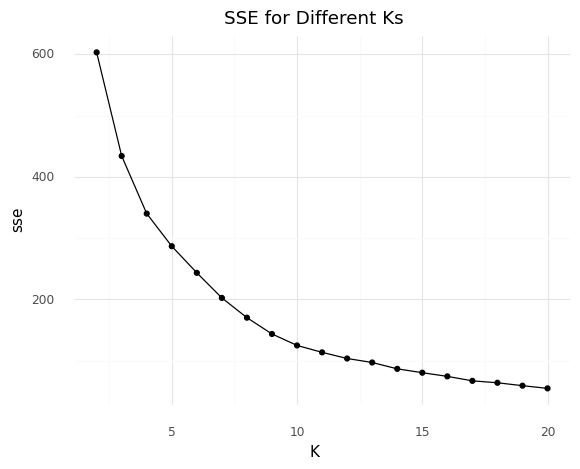

<ggplot: (8731952554798)>

In [ ]:
#work from cpsc392 found on Dr. Parlett's repo

ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

#sum of squared errors - how far apart on average are datapoints from the center of its cluster
sse = []
#sillhouette score 
sils = []

#create a model that tests out each k in ks list and runs it in model and looks at the SSE and Silhouette score of model to see which k did best
for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(subDF)
    
    sse.append(km.inertia_)
    sils.append(silhouette_score(subDF, km.predict(subDF)))

#create dataframe of k, sum of squared error, and silhouette score values  
sse_df = pd.DataFrame({"K": ks,
                      "sse": sse,
                      "silhouette": sils})

#plot k and sse - looking for "elbow", or inflection point
  #inflection point - points of diminishing return, as we add more clusters we are not getting much improvement
  #"Elbow method" - looking for inflection point
(ggplot(sse_df, aes(x = "K", y = "sse")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "SSE for Different Ks"))

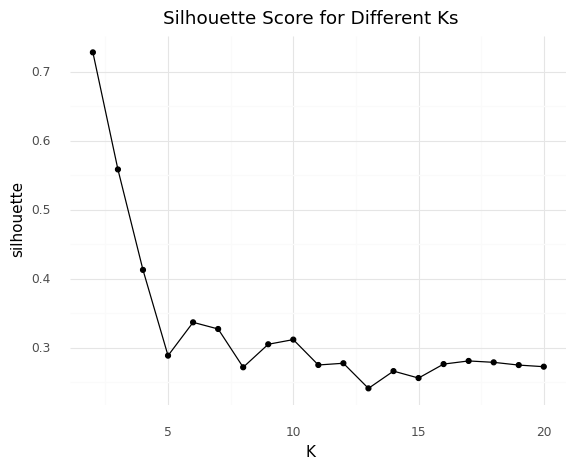

<ggplot: (8731952678364)>

In [ ]:
# plot k and silhouette score - look for highest point
(ggplot(sse_df, aes(x = "K", y = "silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different Ks"))

In [ ]:
km = KMeans(n_clusters = 5)
km.fit(subDF[variables])

DMAS["cluster"] = km.predict(subDF[variables])
DMAS.head()

,DMA,Name,DMA Name,Area,Latitude,Longitude,Country,Population 18+,Household Count,Med HHld Income,HHlds No Vehicles,HHlds 1-2 Vehicles,HHlds 2+ Vehicles,HHld Exp - Public Transport,HHld Exp - Intercity Bus Fare,HHld Exp - Mass Transit,HHld Exp - Taxi,HHld Exp - Other Public Transportation,White,African American,American Indian,Asian,Hawaiian/Pacific Islander,Other Race,Multi-Race,Hispanic,Hhlds Vehicles,Density,CarDependency,PurchasingPower,cluster
0,111,Non-DMA Areas,Non-DMA Areas,524050.67609,63.09978,-151.23083,United States,102531,48817,68110,11966,16091,20760,749,22,129,29,87,57829,2118,29940,10488,364,672,33247,7152,36851,0.093153,0.754880,3324925870,1
1,500,Portland-Auburn (ME),Portland-Auburn (ME),11256.41264,44.36621,-70.39654,United States,813154,439499,59700,31383,148379,259737,730,22,126,28,85,941445,18566,3097,14704,221,614,17448,20036,408116,39.044322,0.928594,26238090300,0
2,501,New York,New York,11734.29043,40.84238,-74.21172,United States,16778672,8025869,76955,2299938,2578274,3147657,1079,32,185,41,126,10286851,3636919,32001,2413446,5202,104864,334620,4906874,5725931,683.967134,0.713434,617630748895,3
3,502,Binghampton,Binghampton,3599.23101,42.28175,-75.49588,United States,271193,144905,52373,14600,51135,79170,664,20,114,25,78,299851,12788,614,10466,80,245,6640,12142,130305,40.259989,0.899244,7589109565,1
4,503,Macon,Macon,8386.80918,32.52069,-83.31905,United States,514116,262841,44920,20194,89611,153036,598,18,103,23,69,355382,266690,1351,11666,251,718,9793,28434,242647,31.339809,0.923170,11806817720,1


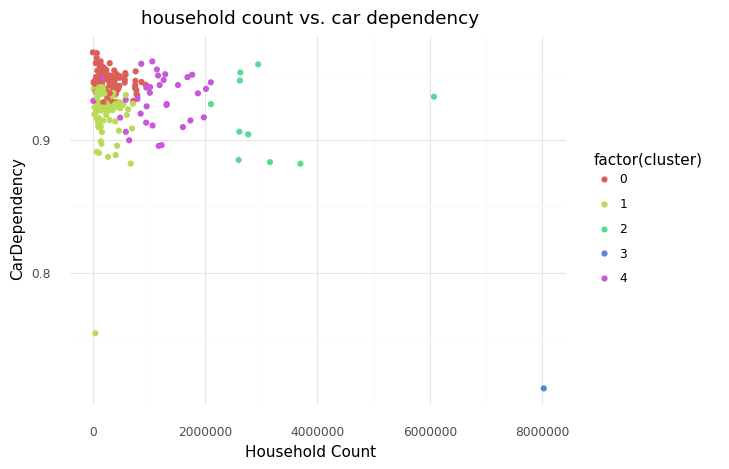

<ggplot: (8731952175216)>

In [ ]:
(ggplot(DMAS, aes(x = "Household Count", y = "CarDependency", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "Household Count", y = "CarDependency", title = "household count vs. car dependency"))

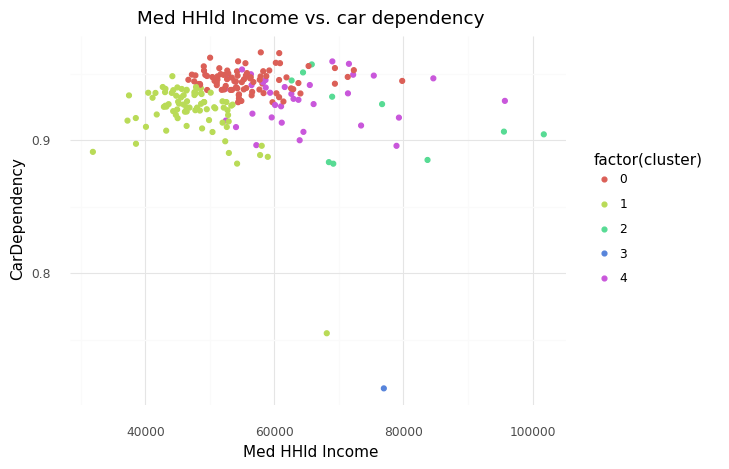

<ggplot: (8731952254058)>

In [ ]:
(ggplot(DMAS, aes(x = "Med HHld Income", y = "CarDependency", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "Med HHld Income", y = "CarDependency", title = "Med HHld Income vs. car dependency"))


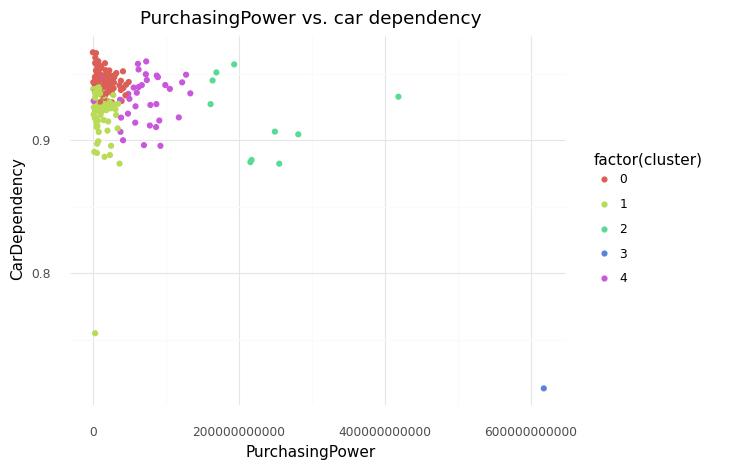

<ggplot: (8731952255862)>

In [ ]:
(ggplot(DMAS, aes(x = "PurchasingPower", y = "CarDependency", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "PurchasingPower", y = "CarDependency", title = "PurchasingPower vs. car dependency"))


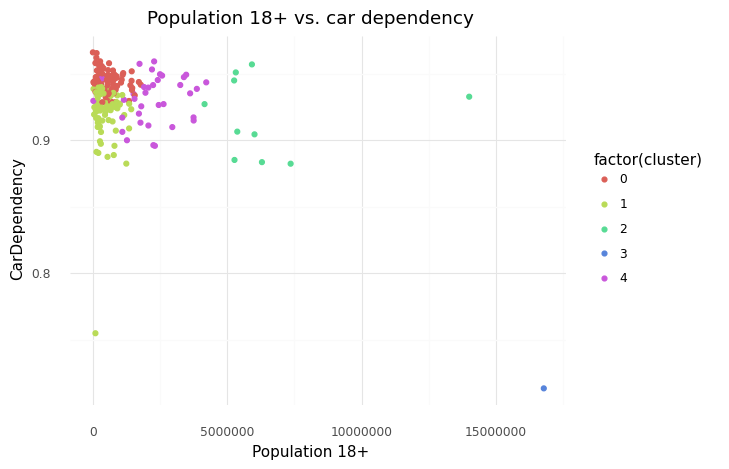

<ggplot: (8731952552012)>

In [ ]:
(ggplot(DMAS, aes(x = "Population 18+", y = "CarDependency", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "Population 18+", y = "CarDependency", title = "Population 18+ vs. car dependency"))


In [ ]:
variables = ["Med HHld Income", "Household Count", "CarDependency", "Population 18+", "PurchasingPower"]

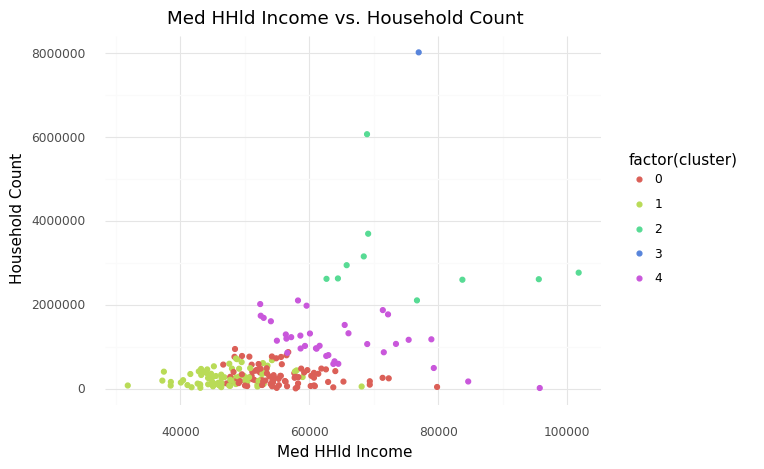

<ggplot: (8731952328506)>

In [ ]:
(ggplot(DMAS, aes(x = "Med HHld Income", y = "Household Count", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "Med HHld Income", y = "Household Count", title = "Med HHld Income vs. Household Count"))

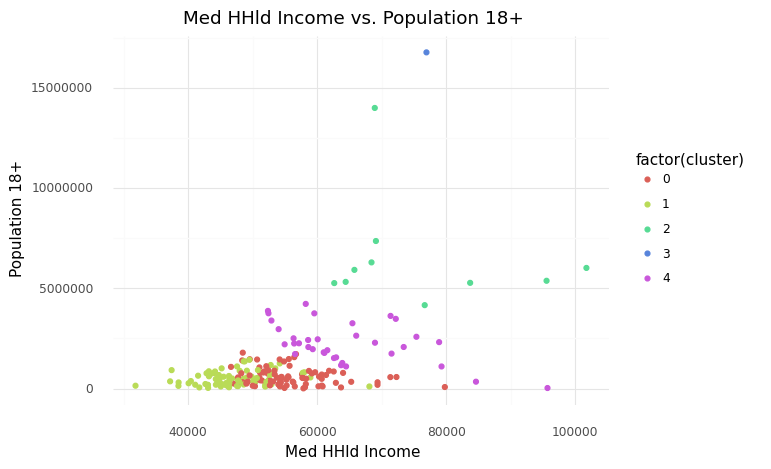

<ggplot: (8731952773617)>

In [ ]:
(ggplot(DMAS, aes(x = "Med HHld Income", y = "Population 18+", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "Med HHld Income", y = "Population 18+", title = "Med HHld Income vs. Population 18+"))

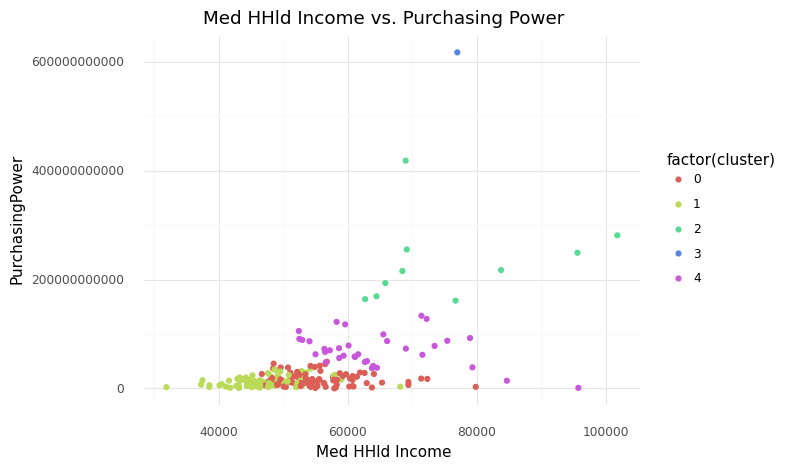

<ggplot: (8731952799386)>

In [ ]:
(ggplot(DMAS, aes(x = "Med HHld Income", y = "PurchasingPower", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "Med HHld Income", y = "PurchasingPower", title = "Med HHld Income vs. Purchasing Power"))

In [ ]:
target_clusterDF = DMAS.loc[(DMAS['cluster'] == 2) | (DMAS['cluster'] == 4)] 

In [172]:
target_clusterDF

,DMA,Name,DMA Name,Area,Latitude,Longitude,Country,Population 18+,Household Count,Med HHld Income,HHlds No Vehicles,HHlds 1-2 Vehicles,HHlds 2+ Vehicles,HHld Exp - Public Transport,HHld Exp - Intercity Bus Fare,HHld Exp - Mass Transit,HHld Exp - Taxi,HHld Exp - Other Public Transportation,White,African American,American Indian,Asian,Hawaiian/Pacific Islander,Other Race,Multi-Race,Hispanic,Hhlds Vehicles,Density,CarDependency,PurchasingPower,cluster,WeightedPurchasingPower
5,504,Philadelphia,Philadelphia,8114.96569,38.99430,-75.38655,United States,6295603,3154381,68438,367296,1078603,1708482,898,26,154,34,105,5065620,1549526,13824,472249,2107,10464,150362,895845,2787085,388.711563,0.883560,215879526878,2,68438.0
6,505,Detroit,Detroit,6210.83278,42.70700,-83.28830,United States,3751712,1978134,59574,163801,687209,1127124,806,24,139,31,94,3294702,1011116,13578,224770,928,4931,105921,221980,1814333,318.497385,0.917194,117845354916,4,59574.0
7,506,Boston-Manchester,Boston-Manchester,9605.67610,42.69416,-71.74831,United States,5275113,2598094,83728,298235,890522,1409337,1071,32,184,41,125,4958971,470299,8963,464940,1351,37039,105921,639989,2299859,270.474871,0.885210,217533214432,2,83728.0
9,508,Pittsburgh,Pittsburgh,10502.82093,39.29013,-79.65919,United States,2257450,1226444,57193,127127,439560,659757,749,22,129,29,88,2432098,214589,3079,64878,548,2702,47257,53551,1099317,116.772818,0.896345,70144011692,4,57193.0
11,510,Cleveland,Cleveland,7850.78767,41.45522,-81.71119,United States,2962083,1605913,54042,144669,547559,913685,722,21,124,28,84,2944293,557168,6307,82514,738,3032,72885,159191,1461244,204.554379,0.909915,86786750346,4,54042.0
12,511,Washington DC,Washington DC,12798.79049,38.42184,-77.86299,United States,5378657,2609994,95570,244012,845233,1520749,1193,35,205,46,138,3557259,1649606,15466,672923,3794,14229,191876,976297,2365982,203.925051,0.906509,249437126580,2,95570.0
13,512,Baltimore,Baltimore,3870.21540,39.15050,-75.90816,United States,2314857,1175185,78919,122409,378241,674535,982,29,169,38,114,1757353,832437,7196,167623,1278,3179,68393,166900,1052776,303.648474,0.895839,92744425015,4,78919.0
16,515,Cincinnati,Cincinnati,7552.97655,39.03393,-84.35632,United States,1807107,960667,61032,71531,294426,594710,797,23,137,31,93,1931797,278225,3847,58694,1168,2616,43689,75152,889136,127.190518,0.925540,58631428344,4,61032.0
18,517,Charlotte,Charlotte,10527.47747,35.04886,-80.76986,United States,2505561,1291184,56357,64991,404286,821907,748,22,129,29,87,2147528,678700,11082,112795,1249,6883,55271,289868,1226193,122.648945,0.949666,72767256688,4,56357.0
22,521,Providence-New Bedford,Providence-New Bedford,1667.40710,41.69949,-71.04026,United States,1275145,649968,63909,64987,234889,350092,822,24,141,32,96,1224378,97559,4184,51882,382,9877,32084,191223,584981,389.807624,0.900015,41538804912,4,63909.0


In [ ]:
target_clusterDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 5 to 207
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   DMA                                     45 non-null     int64  
 1   Name                                    45 non-null     object 
 2   DMA Name                                45 non-null     object 
 3   Area                                    45 non-null     float64
 4   Latitude                                45 non-null     float64
 5   Longitude                               45 non-null     float64
 6   Country                                 45 non-null     object 
 7   Population 18+                          45 non-null     int64  
 8   Household Count                         45 non-null     int64  
 9   Med HHld Income                         45 non-null     int64  
 10  HHlds No Vehicles                       45 non-null     int64  

In [ ]:
above65k = target_clusterDF.loc[target_clusterDF['Med HHld Income'] > 65000]

In [ ]:
above65k.shape

(20, 31)

In [170]:
above65k.to_csv('targetDMAs.csv', index=False)

In [ ]:
target_clusterDF.to_csv('clusterDF.csv', index=False)

In [175]:
len(DMAS['DMA Name'].unique())

211

In [ ]:
target_clusterDF['DMA Name'].unique()

array(['Philadelphia', 'Detroit', 'Boston-Manchester', 'Pittsburgh',
       'Cleveland', 'Washington DC', 'Baltimore', 'Cincinnati',
       'Charlotte', 'Providence-New Bedford', 'Atlanta', 'Indianapolis',
       'Miami-Fort Lauderdale', 'Albany-Schenectady-Troy',
       'Hartford-New Haven', 'Orlando-Daytona Beach-Melbourne',
       'Columbus', 'Tampa-St Petersburg', 'Norfolk-Newport News',
       'Richmond-Petersburg', 'Raleigh-Durham',
       'Harrisburg-Lancaster-Lebanon', 'Chicago', 'St Louis',
       'Minneapolis-St Paul', 'Kansas City', 'Milwaukee', 'Houston',
       'Dallas-Fort Worth', 'Austin', 'San Antonio', 'Nashville',
       'Anchorage', 'Honolulu', 'Juneau', 'Denver', 'Phoenix',
       'Salt Lake City', 'Los Angeles', 'San Francisco-Oakland-San Jose',
       'Seattle-Tacoma', 'Portland (OR)', 'San Diego', 'Las Vegas',
       'Sacramento-Stockton-Modesto'], dtype=object)